### ***910번 노선별 경유 정류소 목록 조회***

In [1]:
# API 요청
import requests

url = 'http://apis.data.go.kr/1613000/BusRouteInfoInqireService/getRouteAcctoThrghSttnList'
params ={'serviceKey' : 'wRGALjymSzbi/GLVDdu69u7/jHfZ6d1luMJ6H3t3uCt5BETeM0wzS48xVuJ0Gv8lqct7bqmHnr6jA47/T4OvLA=='
         , 'pageNo' : '1', 'numOfRows' : '1000000000', '_type' : 'json', 'cityCode' : '37050', 'routeId' : 'GMB91030' }

response = requests.get(url, params=params)
print(response.text)

{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL SERVICE."},"body":{"items":{"item":[{"gpslati":36.12963461,"gpslong":128.3293215,"nodeid":"GMB80","nodenm":"구미역","nodeno":10080,"nodeord":1,"routeid":"GMB91030"},{"gpslati":36.12802335,"gpslong":128.3331997,"nodeid":"GMB167","nodenm":"농협","nodeno":10167,"nodeord":2,"routeid":"GMB91030"},{"gpslati":36.12688792,"gpslong":128.3358796,"nodeid":"GMB134","nodenm":"금오산사거리","nodeno":10134,"nodeord":3,"routeid":"GMB91030"},{"gpslati":36.12604377,"gpslong":128.3378738,"nodeid":"GMB901","nodenm":"원평동 행정복지센터 건너","nodeno":10901,"nodeord":4,"routeid":"GMB91030"},{"gpslati":36.12527783,"gpslong":128.339623,"nodeid":"GMB138","nodenm":"금오시장 건너","nodeno":10138,"nodeord":5,"routeid":"GMB91030"},{"gpslati":36.12386997,"gpslong":128.3421501,"nodeid":"GMB476","nodenm":"송원고가밑(터미널네거리방면)","nodeno":10476,"nodeord":6,"routeid":"GMB91030"},{"gpslati":36.12222128,"gpslong":128.3478662,"nodeid":"GMB803","nodenm":"터미널네거리(오성예식장앞방면)","nodeno":10803,"nodeord"

In [2]:
# json 파일 -> 딕셔너리로 변환
import json

data = json.loads(response.text)
print(type(data))
print(data)

<class 'dict'>
{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}, 'body': {'items': {'item': [{'gpslati': 36.12963461, 'gpslong': 128.3293215, 'nodeid': 'GMB80', 'nodenm': '구미역', 'nodeno': 10080, 'nodeord': 1, 'routeid': 'GMB91030'}, {'gpslati': 36.12802335, 'gpslong': 128.3331997, 'nodeid': 'GMB167', 'nodenm': '농협', 'nodeno': 10167, 'nodeord': 2, 'routeid': 'GMB91030'}, {'gpslati': 36.12688792, 'gpslong': 128.3358796, 'nodeid': 'GMB134', 'nodenm': '금오산사거리', 'nodeno': 10134, 'nodeord': 3, 'routeid': 'GMB91030'}, {'gpslati': 36.12604377, 'gpslong': 128.3378738, 'nodeid': 'GMB901', 'nodenm': '원평동 행정복지센터 건너', 'nodeno': 10901, 'nodeord': 4, 'routeid': 'GMB91030'}, {'gpslati': 36.12527783, 'gpslong': 128.339623, 'nodeid': 'GMB138', 'nodenm': '금오시장 건너', 'nodeno': 10138, 'nodeord': 5, 'routeid': 'GMB91030'}, {'gpslati': 36.12386997, 'gpslong': 128.3421501, 'nodeid': 'GMB476', 'nodenm': '송원고가밑(터미널네거리방면)', 'nodeno': 10476, 'nodeord': 6, 'routeid': 'GMB91030'}, {'gpsla

In [3]:
# 910번 경유 정류소는 총 64개
data['response']['body']['totalCount']

64

In [4]:
type(data['response']['body']['items']['item'])

list

In [5]:
# df로 변환
import pandas as pd

df = pd.DataFrame(data['response']['body']['items']['item'])
df.head()

,gpslati,gpslong,nodeid,nodenm,nodeno,nodeord,routeid
0,36.129635,128.329321,GMB80,구미역,10080,1,GMB91030
1,36.128023,128.333200,GMB167,농협,10167,2,GMB91030
2,36.126888,128.335880,GMB134,금오산사거리,10134,3,GMB91030
3,36.126044,128.337874,GMB901,원평동 행정복지센터 건너,10901,4,GMB91030
4,36.125278,128.339623,GMB138,금오시장 건너,10138,5,GMB91030


In [6]:
# 가독성을 위해 한글명으로 컬럼명 변경
df= df.rename(columns={'gpslati': '위도', 'gpslong': '경도', 'nodeid': '정류소ID', 'nodenm': '정류소명', 'nodeno': '정류소번호'
                   ,'nodeord': '정류소순서', 'routeid': '노선번호'})
df.head(3)

,위도,경도,정류소ID,정류소명,정류소번호,정류소순서,노선번호
0,36.129635,128.329321,GMB80,구미역,10080,1,GMB91030
1,36.128023,128.333200,GMB167,농협,10167,2,GMB91030
2,36.126888,128.335880,GMB134,금오산사거리,10134,3,GMB91030


### ***모든 노선ID를 돌면서 위와 같이 노선별 경유 정류소 목록을 조회하기***

In [8]:
# 모든 노선ID 가져오기
route = pd.read_csv('구미버스_노선번호.csv')
route.head(3)

,종점,막차시간,노선ID,노선번호,노선유형,기점,첫차시간
0,구미역(중앙시장),2146,GMB19120,191,일반버스,옥계이편한세상APT앞,908
1,해평버스정류장,2150,GMB19210,192,좌석버스,구미역,835
2,구미역(중앙시장),2253,GMB19220,192,좌석버스,해평버스정류장,625


In [9]:
route_nums = route.노선ID.values
print(route_nums[0])
print(len(route_nums))

GMB19120
340


In [10]:
route_nums[0] == 'GMB19120'

True

In [11]:
res = []
for num in route_nums:
   # API 요청
   url = 'http://apis.data.go.kr/1613000/BusRouteInfoInqireService/getRouteAcctoThrghSttnList'
   params ={'serviceKey' : 'wRGALjymSzbi/GLVDdu69u7/jHfZ6d1luMJ6H3t3uCt5BETeM0wzS48xVuJ0Gv8lqct7bqmHnr6jA47/T4OvLA=='
         , 'pageNo' : '1', 'numOfRows' : '1000000000', '_type' : 'json', 'cityCode' : '37050', 'routeId' : num }

   response = requests.get(url, params=params)
   if response.status_code == 200:
      data = json.loads(response.text)
      
      if type(data['response']['body']['items']['item']) == list:
         df = pd.DataFrame(data['response']['body']['items']['item'])
         res.append(df)

      elif type(data['response']['body']['items']['item']) == dict:
         df = pd.DataFrame([data['response']['body']['items']['item']])
         res.append(df)

   else: print(num)

In [12]:
# 340개 노선이 정상적으로 들어옴
len(res)

340

In [13]:
# res의 df를 하나로, 14406개 행 모두 null값 없음
df = pd.concat(res, ignore_index=True) # 그 전의 index값 무시하고 index 다시 처음부터 쌓기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14406 entries, 0 to 14405
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gpslati  14406 non-null  object 
 1   gpslong  14406 non-null  float64
 2   nodeid   14406 non-null  object 
 3   nodenm   14406 non-null  object 
 4   nodeno   14406 non-null  int64  
 5   nodeord  14406 non-null  int64  
 6   routeid  14406 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 788.0+ KB


In [14]:
# 가독성을 위해 한글명으로 컬럼명 변경
df= df.rename(columns={'gpslati': '위도', 'gpslong': '경도', 'nodeid': '정류소ID', 'nodenm': '정류소명', 'nodeno': '정류소번호'
                   ,'nodeord': '정류소순서', 'routeid': '노선번호'})
df.head(3)

,위도,경도,정류소ID,정류소명,정류소번호,정류소순서,노선번호
0,36.140325,128.437370,GMB181,옥계이편한세상APT앞,10181,1,GMB19120
1,36.137931,128.433293,GMB6,우미린더스카이앞,10006,2,GMB19120
2,36.13714,128.429446,GMB1,4공단(현진아파트방면),10001,3,GMB19120


In [15]:
# 노선번호 GMB19120의 경유지 목록이 구미버스 정보시스템과 일치하는지 확인 (데이터 정합성)
# 구미 버스정보시스템 -> TAGO -> 네이버 지도 순서로 데이터를 전송하므로 구미 버스 정보시스템과 일치하면 나머지는 자동으로 일치함

df[df.노선번호 == 'GMB19120'].sort_values('정류소순서').head(2)

,위도,경도,정류소ID,정류소명,정류소번호,정류소순서,노선번호
0,36.140325,128.437370,GMB181,옥계이편한세상APT앞,10181,1,GMB19120
1,36.137931,128.433293,GMB6,우미린더스카이앞,10006,2,GMB19120


In [16]:
# 구미 버스정보시스템에서 비교했을 때 191번 (옥계이편한세상APT앞 → 구미역(중앙시장))과 경유지 목록이 일치함
route[route.노선ID == 'GMB19120']

,종점,막차시간,노선ID,노선번호,노선유형,기점,첫차시간
0,구미역(중앙시장),2146,GMB19120,191,일반버스,옥계이편한세상APT앞,908


In [21]:
df.노선번호.nunique()

340

In [ ]:
# 노선번호별 정류소 수
route_cnt = df.groupby('노선번호')['정류소번호'].count()
route_cnt

노선번호
GMB1-110       1
GMB10-130     47
GMB10-230     21
GMB101-110    14
GMB101-120    13
              ..
GMB96020      39
GMB9631       17
GMB9632       17
GMB9710       24
GMB9720       30
Name: 정류소번호, Length: 340, dtype: int64

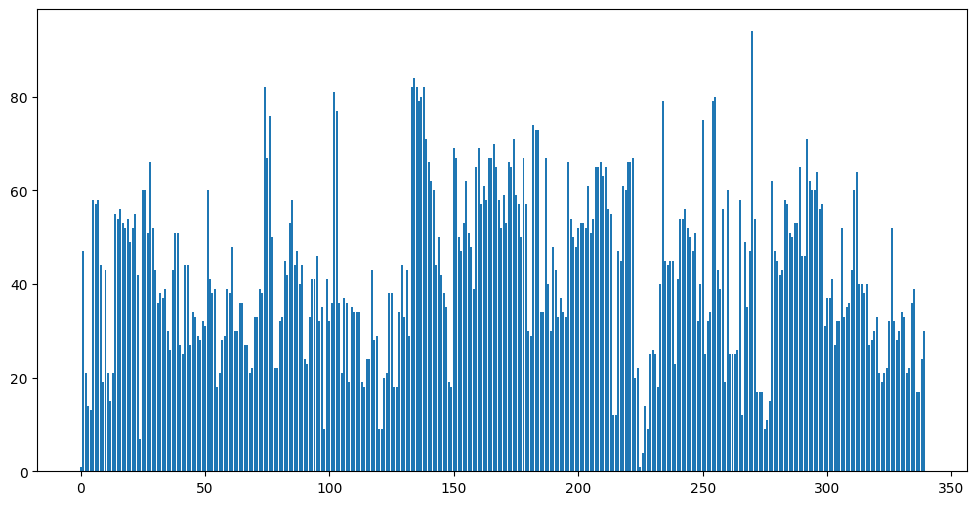

min: 1, max: 94, median: 41.0


In [ ]:
# 막대그래프: 정류소번호별 개수
import matplotlib.pyplot as plt

plt.figure(figsize= (12,6))
plt.bar(range(len(route_cnt)), route_cnt.values)
plt.show()

print(f"min: {route_cnt.min()}, max: {route_cnt.max()}, median: {route_cnt.median()}")

### ***노선별로 구간 만들기***

In [ ]:
# 인덱스 기준 첫번째 노선인 'GMB19120'의 구간 만들기
df[df.노선번호 == 'GMB19120'].head(3)

,위도,경도,정류소ID,정류소명,정류소번호,정류소순서,노선번호
0,36.140325,128.437370,GMB181,옥계이편한세상APT앞,10181,1,GMB19120
1,36.137931,128.433293,GMB6,우미린더스카이앞,10006,2,GMB19120
2,36.13714,128.429446,GMB1,4공단(현진아파트방면),10001,3,GMB19120


In [ ]:
# 순서 정렬: 노선번호별 정류소순서 오름차순
# 구간_이름: '현재 행 정류장_이름 - 다음 행 정류장_이름'
# 주의: 노선번호별로 구간이 만들어져야함. 정류소순서 마지막 번호의 행은 구간_이름이 없어야 함

# 1. df를 노선번호별로 나누고 구간 만들고, 합치기
df[df.노선번호 == 'GMB19120'].sort_values('정류소순서').head(2)

,위도,경도,정류소ID,정류소명,정류소번호,정류소순서,노선번호
0,36.140325,128.437370,GMB181,옥계이편한세상APT앞,10181,1,GMB19120
1,36.137931,128.433293,GMB6,우미린더스카이앞,10006,2,GMB19120


In [28]:
# for 반복문: 노선번호별로 구간_이름 만들고 하나의 df로 합치기
res= []
for num in route_nums:
   bus = df[df.노선번호 == num].sort_values('정류소순서')
   bus['구간_이름'] = bus.정류소명 + " - " + bus.정류소명.shift(-1)
   res.append(bus)
route_df =pd.concat(res, ignore_index=True)
route_df.head()

,위도,경도,정류소ID,정류소명,정류소번호,정류소순서,노선번호,구간_이름
0,36.140325,128.437370,GMB181,옥계이편한세상APT앞,10181,1,GMB19120,옥계이편한세상APT앞 - 우미린더스카이앞
1,36.137931,128.433293,GMB6,우미린더스카이앞,10006,2,GMB19120,우미린더스카이앞 - 4공단(현진아파트방면)
2,36.13714,128.429446,GMB1,4공단(현진아파트방면),10001,3,GMB19120,4공단(현진아파트방면) - 현진아파트앞
3,36.138281,128.426156,GMB852,현진아파트앞,10852,4,GMB19120,현진아파트앞 - 삼구아파트
4,36.138468,128.420709,GMB378,삼구아파트,10378,5,GMB19120,삼구아파트 - 4공단입구건너(인동농협옥계지점)


In [29]:
# concat 잘 되었는지 확인: 모든 행 14,406개 행이 모두 합쳐짐
route_df.shape

(14406, 8)

In [30]:
route_df.노선번호.nunique()

340

In [ ]:
# 노선번호별로 구간이 만들어졌는지 확인: 각 노선의 마지막 정류소는 구간이 NA여야함 -> 정상
route_df.iloc[40:45]

,위도,경도,정류소ID,정류소명,정류소번호,정류소순서,노선번호,구간_이름
40,36.128616,128.332287,GMB119,구미역 전(국민은행),10119,41,GMB19120,구미역 전(국민은행) - 구미역(중앙시장)
41,36.129622,128.329834,GMB79,구미역(중앙시장),10079,42,GMB19120,NaN
42,36.129635,128.329321,GMB80,구미역,10080,1,GMB19210,구미역 - 농협
43,36.128023,128.333200,GMB167,농협,10167,2,GMB19210,농협 - 금오산사거리
44,36.126888,128.335880,GMB134,금오산사거리,10134,3,GMB19210,금오산사거리 - 원평동 행정복지센터 건너


In [ ]:
# 구간 340개가 1개 구간 당 마지막 정류소 1개 -> 총 340개의 na값이 만들어짐
route_df.isna().sum()

위도         0
경도         0
정류소ID      0
정류소명       0
정류소번호      0
정류소순서      0
노선번호       0
구간_이름    340
dtype: int64

In [ ]:
# 정류소 순서가 첫번째인데 구간이 안 만들어진 행
route_df[(route_df.구간_이름.isna()) & (route_df.정류소순서 == 1)]

,위도,경도,정류소ID,정류소명,정류소번호,정류소순서,노선번호,구간_이름
5255,36.130489,128.307412,GMB1998,차고지,11998,1,GMB1-110,NaN
9894,36.141157,128.302546,GMB1999,CNG충전소(탑승불가),11999,1,GMB66610,NaN


In [ ]:
# 이유 확인-> 정류소가 1개 있는 버스 2개: GMB1-110, GMB66610
display(route_df.iloc[5253:5258], route_df.iloc[9890:9898])

,위도,경도,정류소ID,정류소명,정류소번호,정류소순서,노선번호,구간_이름
5253,36.224832,128.310866,GMB37,고아에덴아파트앞,10037,65,GMB5210,고아에덴아파트앞 - 선산터미널종점
5254,36.239564,128.304290,GMB435,선산터미널종점,10435,66,GMB5210,NaN
5255,36.130489,128.307412,GMB1998,차고지,11998,1,GMB1-110,NaN
5256,35.988983,128.399696,GMB2355,왜관남부,12355,1,GMB10-130,왜관남부 - 왜관역
5257,35.992349,128.399163,GMB2718,왜관역,12718,2,GMB10-130,왜관역 - 왜관북부


,위도,경도,정류소ID,정류소명,정류소번호,정류소순서,노선번호,구간_이름
9890,36.089609,128.373154,GMB840,한염건너,10840,19,GMB6030,한염건너 - 신창메디칼앞
9891,36.088353,128.376846,GMB524,신창메디칼앞,10524,20,GMB6030,신창메디칼앞 - 성안합섬건너
9892,36.08432,128.376902,GMB446,성안합섬건너,10446,21,GMB6030,성안합섬건너 - 오태1동
9893,36.079687,128.375109,GMB607,오태1동,10607,22,GMB6030,NaN
9894,36.141157,128.302546,GMB1999,CNG충전소(탑승불가),11999,1,GMB66610,NaN
9895,36.239564,128.304290,GMB435,선산터미널종점,10435,1,GMB70-130,선산터미널종점 - 황산
9896,36.2131,128.290178,GMB873,황산,10873,2,GMB70-130,황산 - 황산출발
9897,36.212931,128.290558,GMB874,황산출발,10874,3,GMB70-130,황산출발 - 선산터미널종점


In [26]:
# 필요한 데이터는 정류소가 아닌 구간이므로 na인 구간을 삭제
print(route_df.shape)
route_df = route_df.dropna()
print(route_df.shape)

(14406, 8)
(14066, 8)


In [27]:
route_df.노선번호.nunique()

338

In [ ]:
# 필요한 컬럼만 확인
target_columns = ['노선번호', '정류소순서', '구간_이름']
route_df = route_df[target_columns]
route_df

,노선번호,정류소순서,구간_이름
0,GMB19120,1,옥계이편한세상APT앞 - 우미린더스카이앞
1,GMB19120,2,우미린더스카이앞 - 4공단(현진아파트방면)
2,GMB19120,3,4공단(현진아파트방면) - 현진아파트앞
3,GMB19120,4,현진아파트앞 - 삼구아파트
4,GMB19120,5,삼구아파트 - 4공단입구건너(인동농협옥계지점)
...,...,...,...
14400,GMB9720,25,4공단입구건너(인동농협옥계지점) - 옥계대우아파트앞
14401,GMB9720,26,옥계대우아파트앞 - 신나리아파트
14402,GMB9720,27,신나리아파트 - 옥계중학교앞
14403,GMB9720,28,옥계중학교앞 - 금오공대입구(금오공대종점방면)


In [ ]:
# 노선별_구간.csv 생성
route_df.to_csv('노선별_구간.csv', index=False)